# Exploratory Data Analysis for predicting the best quality white wine

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/Users/julienguyen/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
white_wine_csv = './datasets/winequality-white.csv'
white_wine = pd.read_csv(white_wine_csv, sep=';')

In [3]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
#renamed column names 
white_wine.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [5]:
white_wine.shape

(4898, 12)

In [6]:
white_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
#double-check column names
white_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_diox', 'ttl_sulfur_diox', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
#find number of unique values for each variable
white_wine.nunique(axis=0)

fixed_acidity        68
volatile_acidity    125
citric_acid          87
residual_sugar      310
chlorides           160
free_sulfur_diox    132
ttl_sulfur_diox     251
density             890
pH                  103
sulphates            79
alcohol             103
quality               7
dtype: int64

In [9]:
#get quick summ stats for dataset
white_wine.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_diox,ttl_sulfur_diox,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
#check for NaN values
white_wine.isnull().values.any()

False

In [11]:
#another check for NaN values by column
white_wine.isnull().sum()

fixed_acidity       0
volatile_acidity    0
citric_acid         0
residual_sugar      0
chlorides           0
free_sulfur_diox    0
ttl_sulfur_diox     0
density             0
pH                  0
sulphates           0
alcohol             0
quality             0
dtype: int64

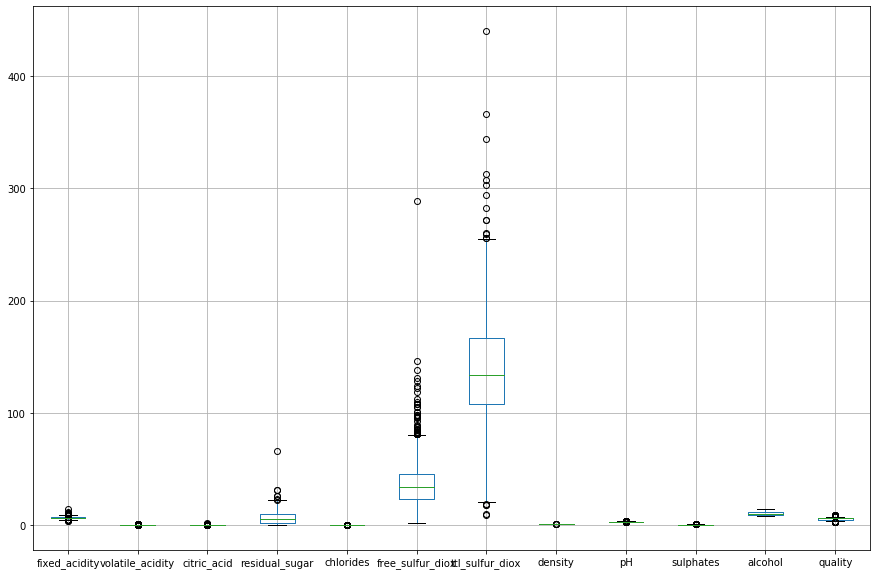

In [12]:
#boxplot to see outliers for each variable
white_wine.boxplot(figsize=(15,10));

In [13]:
white_wine.corr

<bound method DataFrame.corr of       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020

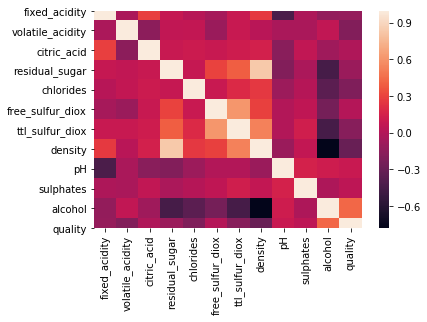

In [14]:
#heatmap to see which variable correlates to each other
sns.heatmap(white_wine.corr());

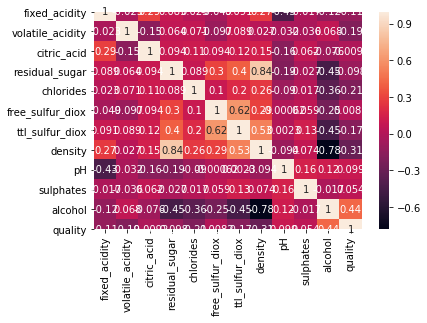

In [15]:
# calculate correlation matrix
corr = white_wine.corr()
# plot the heatmap with specific values
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

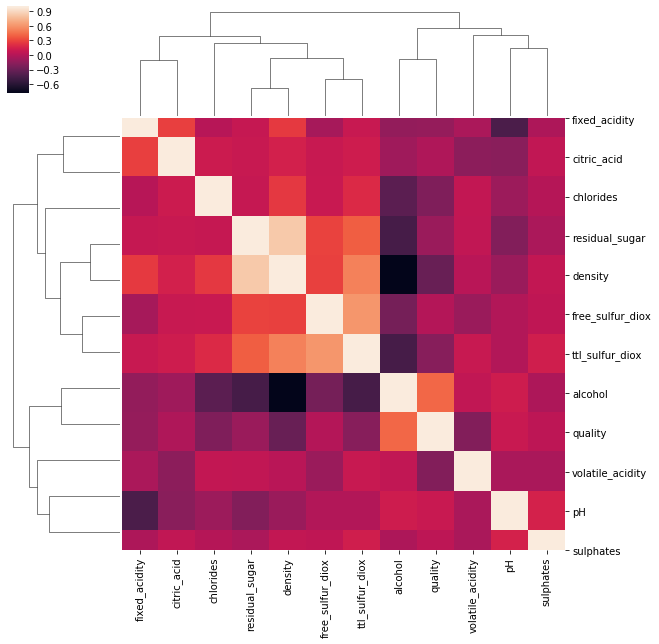

In [16]:
#another correlation clustermap
sns.clustermap(white_wine.corr());

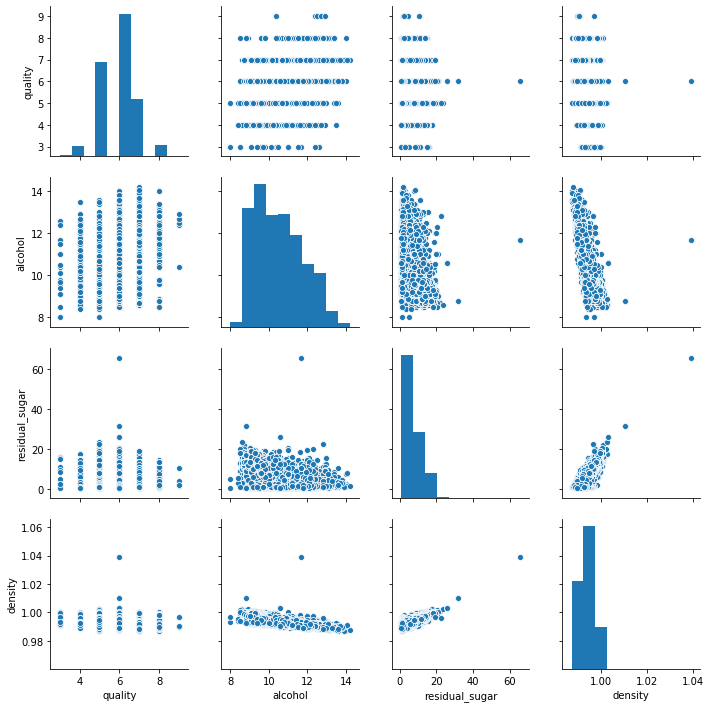

In [17]:
sns.pairplot(white_wine, vars=['quality', 'alcohol', 'residual_sugar', 'density']);

In [18]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [19]:
white_wine['quality'].value_counts(normalize=True)

6    0.448755
5    0.297468
7    0.179665
8    0.035729
4    0.033279
3    0.004083
9    0.001021
Name: quality, dtype: float64

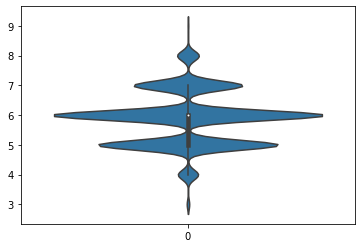

In [20]:
sns.violinplot(data=white_wine['quality']);

In [21]:
white_wine['quality'].describe()

count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [22]:
white_wine.corr()[['quality']].sort_values(by='quality', ascending = False)

,quality
quality,1.000000
alcohol,0.435575
pH,0.099427
sulphates,0.053678
free_sulfur_diox,0.008158
citric_acid,-0.009209
residual_sugar,-0.097577
fixed_acidity,-0.113663
ttl_sulfur_diox,-0.174737
volatile_acidity,-0.194723


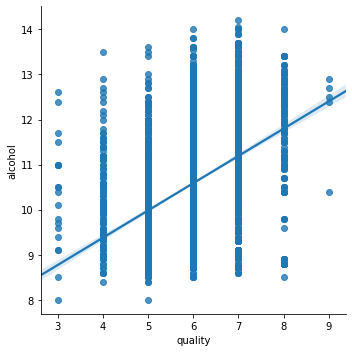

In [23]:
sns.lmplot(x='quality', y='alcohol', data=white_wine);

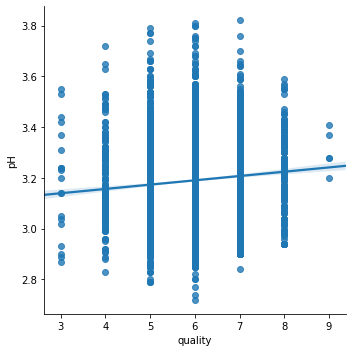

In [24]:
sns.lmplot(x='quality', y='pH', data=white_wine);

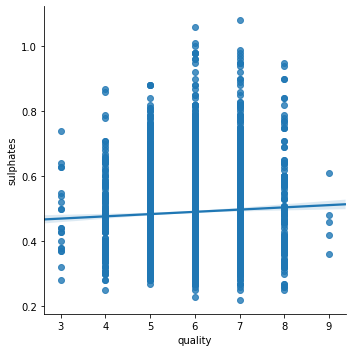

In [25]:
sns.lmplot(x='quality', y='sulphates', data=white_wine);

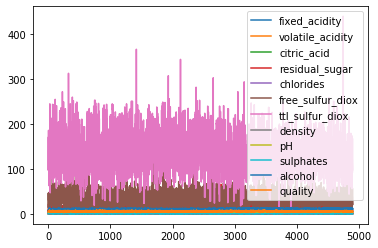

In [26]:
white_wine.plot();

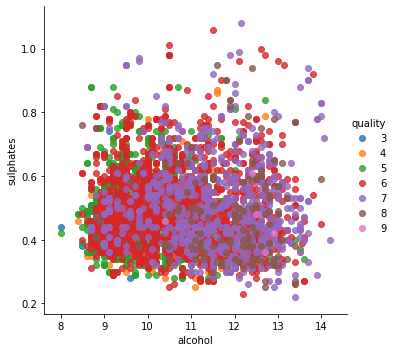

In [27]:
sns.lmplot(x='alcohol', y='sulphates', data=white_wine,
           fit_reg=False,
           hue='quality');

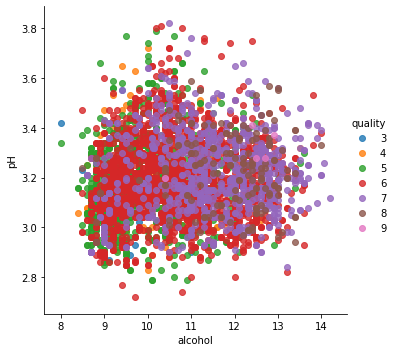

In [28]:
sns.lmplot(x='alcohol', y='pH', data=white_wine,
           fit_reg=False,
           hue='quality');

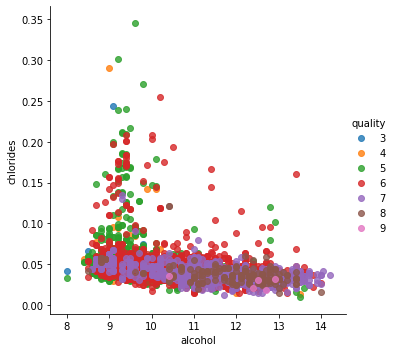

In [29]:
sns.lmplot(x='alcohol', y='chlorides', data=white_wine,
           fit_reg=False,
           hue='quality');